# Ngram Text Wordcloud

The following notebook takes you through the code to create a ngram (unigram, bigram, trigram, et cetera) wordcloud.

###  Before we begin
Before we start, you will need to have set up a [Carbonate account](https://kb.iu.edu/d/aolp) in order to access [Research Desktop (RED)](https://kb.iu.edu/d/apum). You will also need to have access to RED through the [thinlinc client](https://kb.iu.edu/d/aput). If you have not done any of this, or have only done some of this, but not all, you should go to our [textPrep-Py.ipynb](textPrep-Py.ipynb) before you proceed further. The textPrep-Py notebook provides information and resources on how to get a Carbonate account, how to set up RED, and how to get started using the Jupyter Notebook on RED.   

### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by simply typing "pip install nameofpackage --user" (minus the quotes). 


- **textblob:** Library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. 

- **nltk:** Platform for building Python programs to work with human language data.

- **os:** This module provides a portable way of using operating system dependent functionality.

- **re:** Provides regular expression matching operations similar to those found in Perl.

- **string:** contains a number of useful constants and classes, as well as some deprecated legacy functions that are also available as methods on strings.

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

- **collections:** Implements specialized container datatypes providing alternatives to Python's general purpose built-in containers: dict, list, set, and tuple.

- **wordcloud:** A simple wordcloud generator in Python.

- **PIL:** Stands for Python Imaging Library and adds image processing capabilities.

- **numpy:** The fundamental package for scientific computing with Python.

- **operator:** Exports a set of functions corresponding to the intrinsic operators of Python.

- **glob:** Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

- **matplotlib:** A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

In [1]:
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import os
import re

import string
import pandas as pd
from collections import Counter, defaultdict
import wordcloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import operator
import glob

import matplotlib.pyplot as plt

%matplotlib inline

### Stopwords
Here we save the nltk stopwords list as the variable 'stop_words' (minus the quotes). If you need a different language, simply change 'english' (keep the quotes) to the anglicized name of the language you wish to use (e.g. 'spanish' instead of 'espanol' or 'german' instead of 'deutsch'). If you wish to add additional words to the stop_words variable, add the word in quotes to the list in stop_words.extend(['the', 'words', 'you', 'want', 'to', 'add']). 

In [2]:
stop_words = stopwords.words('english')
stop_words.extend(['would', 'said', 'says', 'good'])

### Functions
We need to create a function in order to calculate and create a wordcloud. Any time you see 'def' (without the quotes) that means we are DEclaring a Function. The 'def' is usually followed by the name of the function being created and then in parentheses are the arguments the function requires. After the parentheses is a colon, which closes the declaration, then a bunch of code below which is indented. The indented code is the program statement or statements to be executed or in other words what the function is doing. Once you have created your function all you need to do in order to run it is call the function by name and make sure you have included all the required arguments in the parentheses. This allows you to do what the function does without having to write out all the code in the function every time you wish to perform that task.

#### Text Cleaning

The function does some text cleaning for us and requires the arguments: text (as in what text are you cleaning) and whether or not you have an additional stopword list. The =None means that the default is that there is no additional stopwords list, so if you put nothing, it will automatically assume there is no other stopwords list.

Now we come to the statements to be executed. First we lowercase the text or else 'Love' and 'love' will be counted as two different words, so we make them all 'love'. Then we split the text into individual words and remove empty spaces. Then we remove any digits, stopwords, and punctuation and return a list of cleaned words.

If you wish to use a stopword list of a language other than English, simply replace 'english' (with the quotes this time) in the cell below with the anglicized name of your language of interest (meaning 'spanish' instead of 'espanol' and 'german' instead of 'deutsch'). There is a limit to the languages available using NLTK's stopwords. The list of available languages can be found by running the code: 'stopwords.fileids()' (without the quotes).

In [3]:
def textClean(text, stopWordsList = None):
    
    text = text.strip().lower()
    
    tweets = re.sub(r"http\S+", "", text)
    
    tokens = re.split(r'\W+', tweets )
    
    # remove empty string
    tokens = [t for t in tokens if t]
    
    # remove digits
    tokens = [t for t in tokens if not t.isdigit()]
    
    # built-in stop words list
    tokens = [t for t in tokens if t not in stop_words]
    
    # custom stop words list
    if stopWordsList is not None:
        tokens = [t for t in tokens if t not in stopWordsList]
        
    # remove punctuation
    puncts = list(string.punctuation)
    puncts.append('--')

    tokens = [t for t in tokens if t not in puncts]

    return tokens

#### File paths and additional stopwords

Now we need to point to the directories we will be using. This includes a directory that houses a file with additional stopwords to add to the one from the nltk package we used in our cleaning script above.

This is where you will most likely be making changes. You will need to change the file paths to match the ones on your Carbonate account or computer. The first one 'stopWordsFilepath' we use to point to our additional stopwords file. The second one 'dataHome' points to the directory where our data file or files are located.

Then we have to point to the additional stopwords file and read it and lowercase all the words in the list and save the final opened and lowercased list of stopwords as a variable to use later.

However, we don't currently need an additional stopwords list, so those lines of code are commented out. If you want to use an additional list simply remove the '#' from the front of the lines and change stopWordsFilepath to point to the location of your stopword list.

In [4]:
# load custom stop words list

#stopWordsFilepath = '/Users/klosteda/Text-Analysis/data/earlyModernStopword.txt'

dataHome = '/N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1'

#with open(stopWordsFilepath, "r") as f:
    #stopWordsList = f.readlines()
            
#stopWordsList = [w.strip().lower() for w in stopWordsList]

#### Reading in the Text

Now we read in the text. You can read in one file, or the entire directory. To read in the entire directory replace the file name in the first line with "\*.txt" (with the quotes). This will read in every file ending with .txt.

##### NOTE:
If you added your own additional stopwords list in block of code before this, then you'll need to change the line of code that says 'cleanText.extend(textClean(text))' to 'cleanText.extend(textClean(text, stopWordsList))'.

In [5]:
cleanText = []

for path in glob.glob(os.path.join(dataHome, "102.txt")):
    with open(path, "r") as f:
         # skip hidden file
        if path.startswith('.'):
            continue
        text = f.read()
        cleanText.extend(textClean(text))
        

    print('Finished tokenizing text {}\n'.format(path))



Finished tokenizing text /N/u/klosteda/Carbonate/Text-Analysis/data/StarTrekNextGenClean/season1/102.txt



No changes needed here. This just converts our text to a str object so we can find ngrams later.

In [6]:
cleanTokens = ' '.join(cleanText)

### Find Ngrams

We use the textblob package to get out ngrams. We have unigrams, bigrams, and trigrams saved as variables for use later. There should be no reason to make changes here.

In [7]:
blob = TextBlob(cleanTokens)

unigrams = blob.ngrams(n=1)
bigrams = blob.ngrams(n=2)
trigrams = blob.ngrams(n=3)

Now we are converting our ngrams, in this case bigrams, to a list of bigrams which we can then put into a dataframe to be turned into a wordcloud. The only change you may want to make is to change the word bigram to trigram or unigram depending on what you're interested in.

In [8]:
ngramList = []
for wlist in bigrams:
   ngramList.append(' '.join(wlist))

Now we make our dataframe. You won't need to make changes to this code. Just note that we had to go through the dataframe and replace the space between our bigrams with an underscore. This is because the Python wordcloud package has trouble handling the space, so we connect our bigrams with an underscore so that the wordcloud package will see it as one word, but humans can see it as two.

In [9]:
df = pd.DataFrame(ngramList)
df = df.replace(' ', '_', regex=True)
dfCounts = df[0].value_counts()
countsDF = pd.DataFrame(dfCounts)
df_C = countsDF.rename(columns={'index':'ngrams', 0:'freq'})
df_C = df_C.sort_values('freq', ascending = False)

Now lets see what our dataframe looks like. If you want to see more, just change the number in parentheses.

In [10]:
df_C.head(10)

,freq
yes_sir,15
farpoint_station,14
mister_riker,12
first_officer,10
nine_point,9
aye_sir,8
commander_riker,8
captain_picard,7
groppler_zorn,6
commander_data,6


### Plot our wordcloud

We begin by determining the shape of the wordcloud. The wordcloud package uses an image file which is refered to as a mask to determine the shape. We have images to use for making wordcloud shapes and the path in the first line points to the folder the images are stored in. Simply adjust the path to point to where this folder is located on Carbonate for you. Then in the next line choose the name of the image file you wish to use.

Next we save our dataframe we made above as the variable 'text'. You should not need to change this part of the code.

Then we create an additional list of stopwords that will remove problematic ngrams. Just remember to type the ngram with an underscore between the two words.

Next we give parameters for our wordcloud. and save them as "wc". In this line the 'colormap =' part is probably the only part you might want to change. The current color is from the RColorBrewer palette of colors. You can find other color options [here](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf). Just put the name of the color selection you want in quotes.

Finally, change the file path in plt.savefig to match the location and file name you want the png file of the wordcloud to be saved. 

Run the code and generate your ngram wordcloud!!

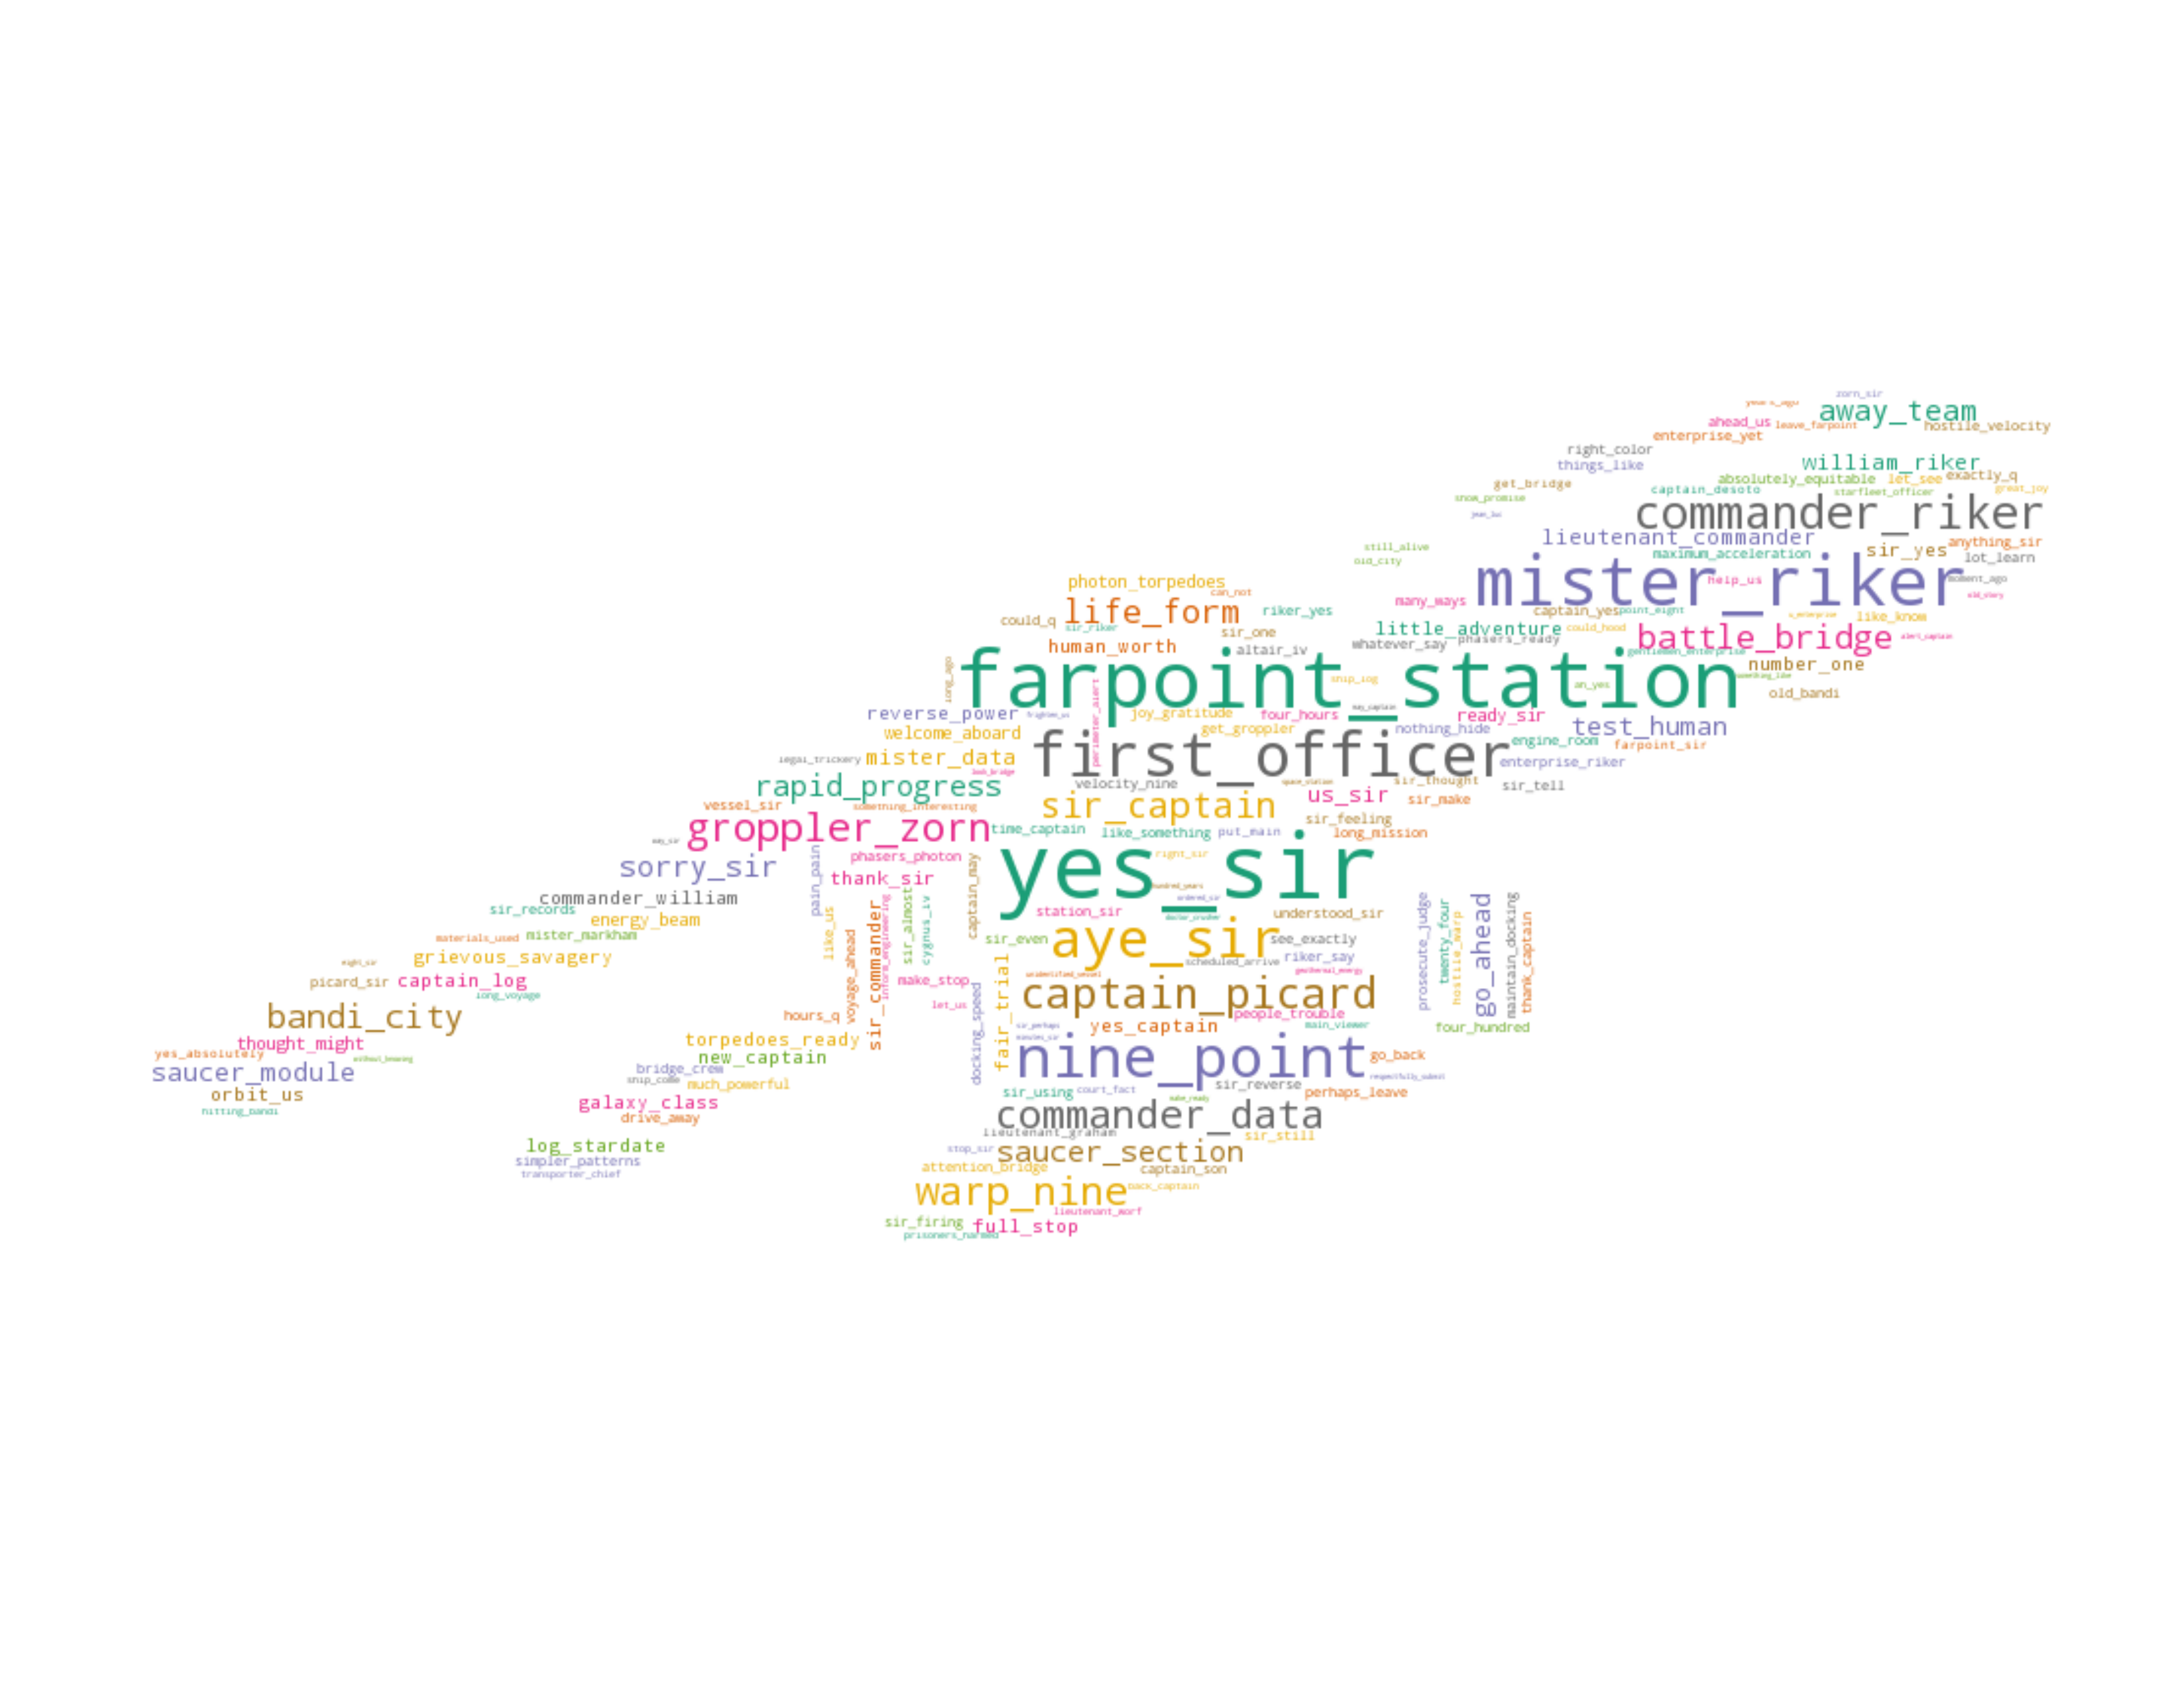

In [11]:
maskPath = '/N/u/klosteda/Carbonate/Text-Analysis/data/wordcloudMasks'
mask = np.array(Image.open(os.path.join(maskPath, "Enterprise.png")))

text = df_C

stopwords = set(STOPWORDS)
stopwords.update(["columns", "rows"])
    
wc = wordcloud.WordCloud(background_color = "white", colormap = 'Dark2', mask = mask, stopwords = stopwords).generate_from_frequencies(text['freq'])

# show
plt.figure(figsize = (80, 40))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")

plt.tight_layout()
    
# save graph as a png image to file
plt.savefig('/N/u/klosteda/Carbonate/Text-Analysis/Output/ngramWordCloudStarTrek.png', format = 'png', dpi = 300, bbox_inches = 'tight')
    
    


plt.show()

## VOILA!!